In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from server_queue import server_system

In [22]:
def get_energy_level(arr_x):
    num_amount = np.shape(arr_x)[0]
    total_eng = 0
    for i in range(num_amount):
        for j in range(i+1,num_amount):
            total_eng += 1/np.linalg.norm(arr_x[i]-arr_x[j])
    return total_eng

def generate_n_samples(n,m=0):
    if m==0:
        arr_coord = (np.random.rand(n,2))-0.5
    else:
        arr_coord = (np.random.rand(m,n,2))-0.5
        
    return arr_coord
    
    
def iterate_rand_charges(arr_x,m=0,prob=1 ,dist=0.5,directional=False):
    num_amount = np.shape(arr_x)[0]
    copy_arr_x = arr_x.copy()
    last_energy = get_energy_level(copy_arr_x)
    if m ==0:

        for i in range(num_amount):
            copy_arr_x[i]+=((np.random.rand(2)*2)-1)*dist
            while (np.linalg.norm(copy_arr_x[i])>1):
                   copy_arr_x[i]= arr_x[i]+((np.random.rand(2)*2)-1)*dist
            if(get_energy_level(copy_arr_x)>last_energy):
                copy_arr_x[i] =arr_x[i]
    else:
        for k in range(m):
            for i in range(num_amount):
                copy_arr_x[k][i]+=((np.random.rand(2)*2)-1)*dist
                while (np.linalg.norm(copy_arr_x[k][i])>1):
                       copy_arr_x[k][i]= arr_x[k][i]+((np.random.rand(2)*2)-1)*dist
                if(get_energy_level(copy_arr_x[k])>last_energy):
                    copy_arr_x[k][i] =arr_x[k][i]
                    
    return copy_arr_x

def directional_energy(arr_x,index_i):
    num_datapoints = len(arr_x)-1
    arr_center = (np.sum(arr_x,axis = 0)-arr_x[index_i])/num_datapoints
    
    arr_direction = arr_x[index_i]-arr_center
    ret_force = arr_direction/(np.linalg.norm(arr_direction)**3)
    return ret_force
    

def iterate_n_times(arr_x,n,m=0,prob=1 ,annealing_factor = 0.975, dist=1):
    copy_arr_x = arr_x.copy()
    for i in range(n):
        brownian =dist * annealing_factor**i
        copy_arr_x = iterate_rand_charges(copy_arr_x,m,prob=prob ,dist=brownian)
    return copy_arr_x


0.5032197474779515
3.8971259841377446
23.133805597104576
60.941762155915725
200.10869930194713
925.4282437468838


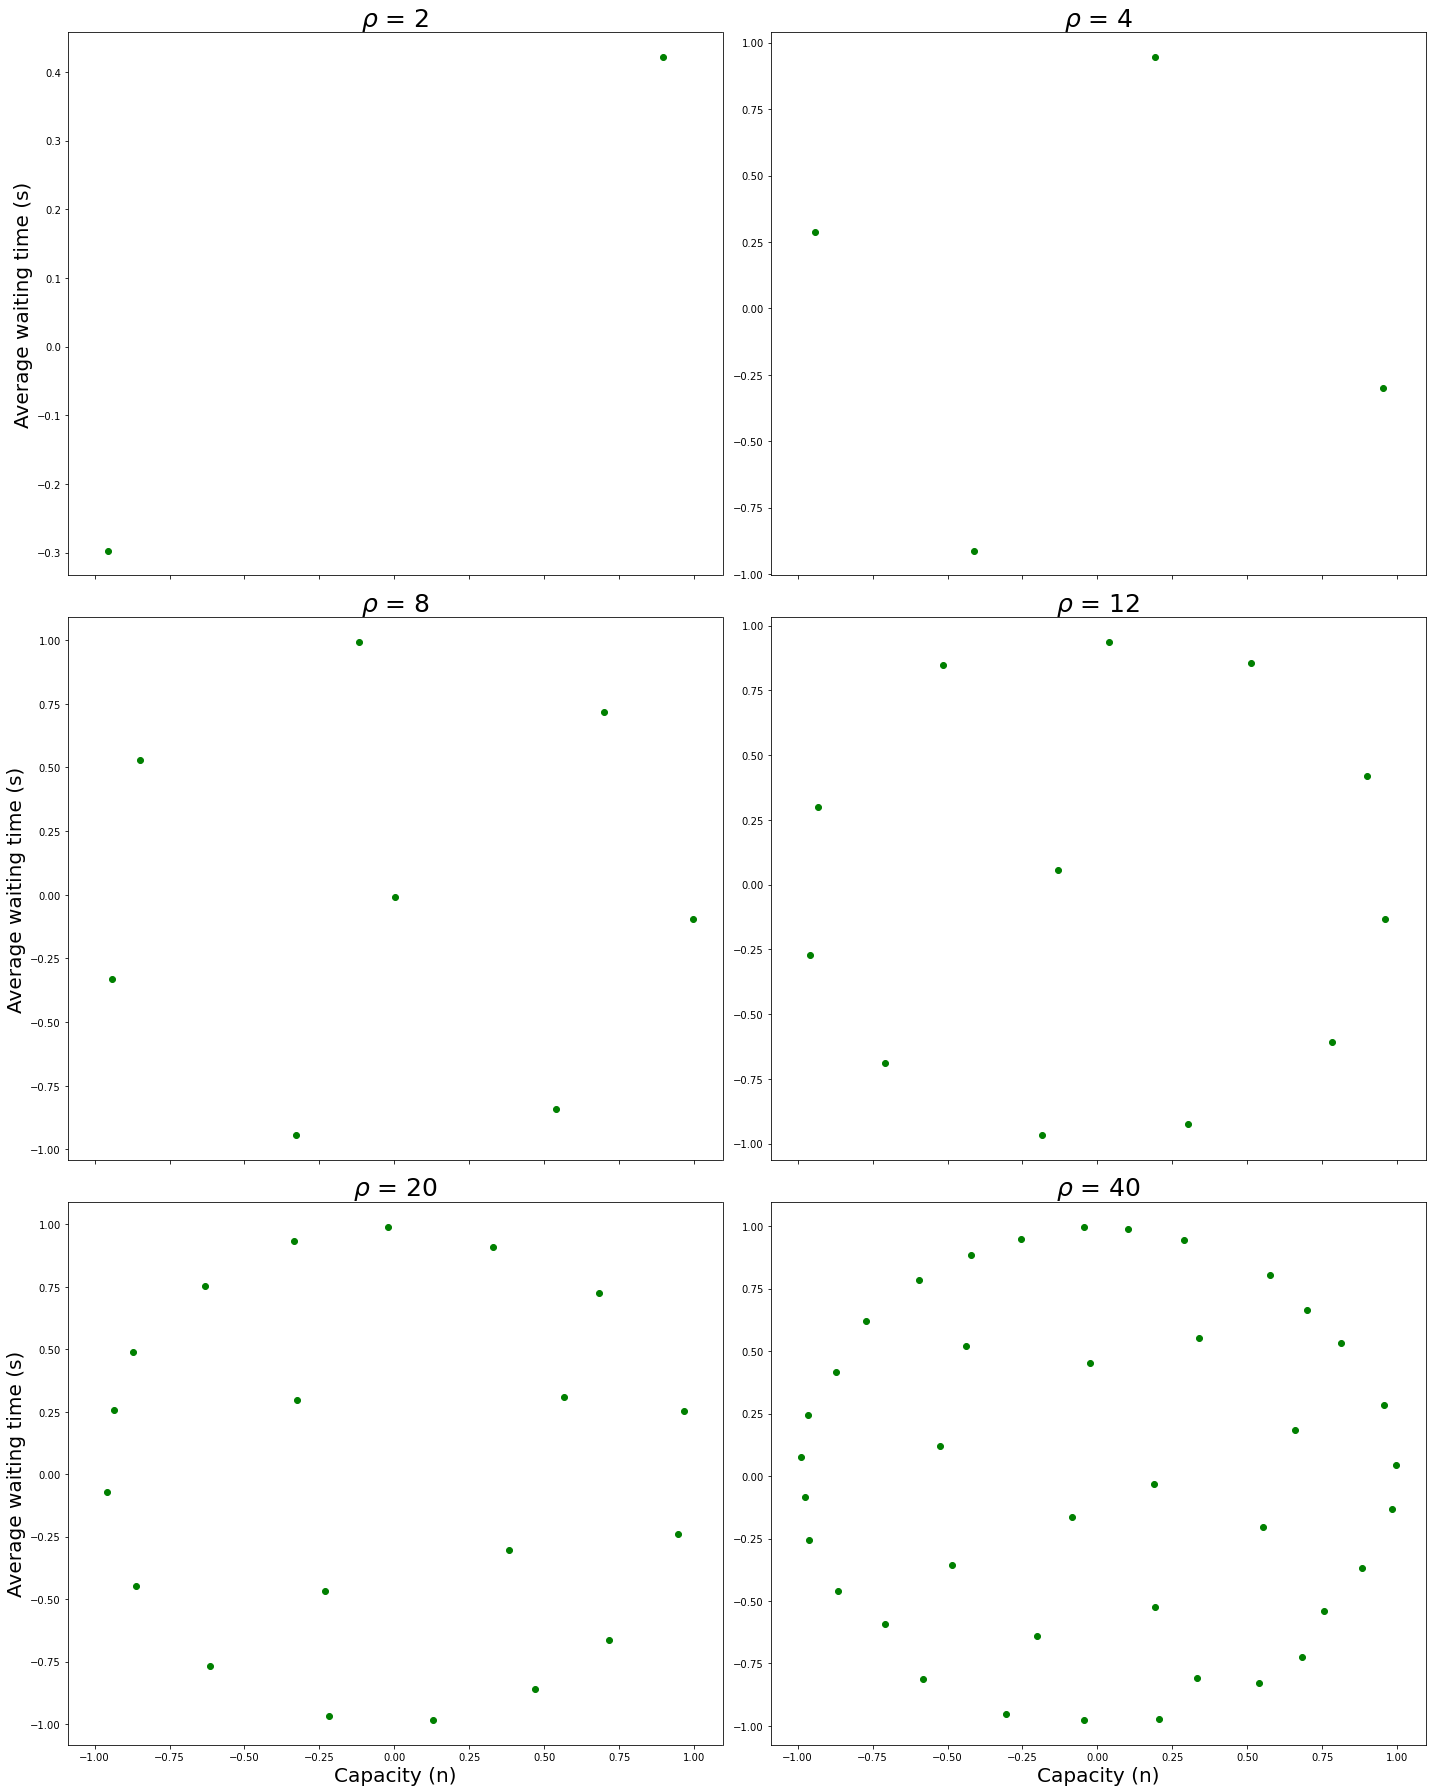

In [25]:
fig, axs = plt.subplots(3, 2, figsize = (20, 25), sharex = True)
m=100
iterations = 200
loc_annealing_factor =1 - 0.5**8
dist_param = 1

new_charges = generate_n_samples(2)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[0,0].plot(new_charges.T[0],new_charges.T[1],"go")

new_charges = generate_n_samples(4)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[0,1].plot(new_charges.T[0],new_charges.T[1],"go")

new_charges = generate_n_samples(8)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[1,0].plot(new_charges.T[0],new_charges.T[1],"go")

new_charges = generate_n_samples(12)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[1,1].plot(new_charges.T[0],new_charges.T[1],"go")
    
new_charges = generate_n_samples(20)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[2,0].plot(new_charges.T[0],new_charges.T[1],"go")

new_charges = generate_n_samples(40)
new_charges = iterate_n_times(new_charges,iterations,prob=1 ,annealing_factor = loc_annealing_factor,dist=dist_param)
print(get_energy_level(new_charges))
axs[2,1].plot(new_charges.T[0],new_charges.T[1],"go")
    
axs[0,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[1,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[2,0].set_ylabel('Average waiting time (s)', fontsize = 20)
axs[2,0].set_xlabel('Capacity (n)', fontsize = 20)
axs[2,1].set_xlabel('Capacity (n)', fontsize = 20)

axs[0,0].set_title(r'$\rho$ = 2', fontsize = 25)
axs[0,1].set_title(r'$\rho$ = 4', fontsize = 25)
axs[1,0].set_title(r'$\rho$ = 8', fontsize = 25)
axs[1,1].set_title(r'$\rho$ = 12', fontsize = 25)
axs[2,0].set_title(r'$\rho$ = 20', fontsize = 25)
axs[2,1].set_title(r'$\rho$ = 40', fontsize = 25)

plt.tight_layout()
plt.savefig('md_vs_mh.pdf')
plt.show()

In [24]:
get_energy_level(new_charges)

2349.4356022355228